<a href="https://colab.research.google.com/github/manasik29/Prediction-of-Salary-of-individuals-based-of-Years-of-Experience/blob/main/Prediction_on_Salary_Data(SLR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***2) Salary_hike -> Build a prediction model for Salary_hike***

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

***Load Data & Libraries***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data_s = pd.read_csv('/content/Salary_Data.csv')

In [4]:
data_s

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


***EDA***

In [6]:
data_s.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
data_s.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [8]:
data_s.shape

(30, 2)

In [9]:
data_s.dtypes

YearsExperience    float64
Salary             float64
dtype: object

No need for dtype correction or transformation

In [10]:
#Check for missing values
data_s.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

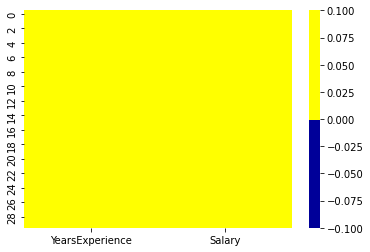

In [11]:
#to genrate heat map
import seaborn as sns
cols = data_s.columns
colors = ['#000099', '#ffff00']   #define colors, yellow for missing, blue for non missing
sns.heatmap(data_s[cols].isnull(),
               cmap= sns.color_palette(colors))

Hence, we can conclude no missing values.

In [12]:
#Check for duplicated values
data_s[data_s.duplicated()].shape

(0, 2)

Hence, no duplicated rows.

In [13]:
#Check for Outliers
data_s.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f3622ac1550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3622ac1fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3622ac1050>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3622ac9ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3622acd050>],
 'means': []}

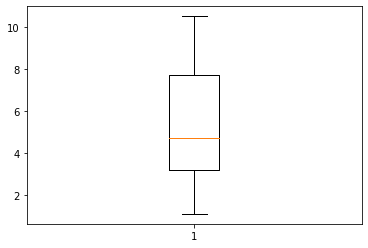

In [14]:
#plot boxplot
plt.boxplot(data_s.YearsExperience)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


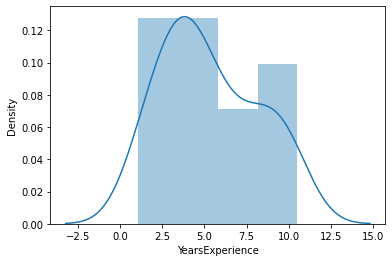

In [15]:
#plot histogram
sns.distplot(data_s.YearsExperience)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3622986390>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3622986e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f362297ee50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f362298e910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f362298ee50>],
 'means': []}

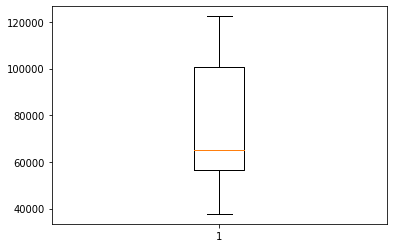

In [16]:
#plot boxplot
plt.boxplot(data_s.Salary)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


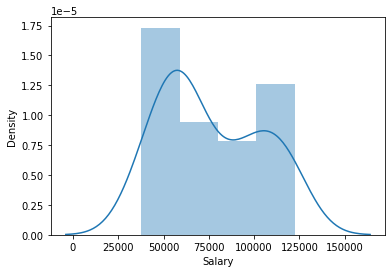

In [17]:
#plot dist plot
sns.distplot(data_s.Salary)

Hence, we can conclude there are no outliers in dataset.

**Performing Transformations on each columns**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


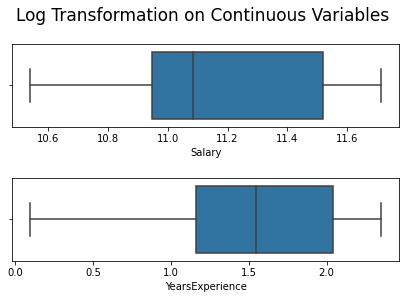

In [24]:
fig, ax=plt.subplots(2, figsize=(6,4), sharex= False, sharey = False)
sns.boxplot(np.log(data_s.Salary), ax=ax[0])
sns.boxplot(np.log(data_s.YearsExperience), ax=ax[1])
plt.suptitle("Log Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


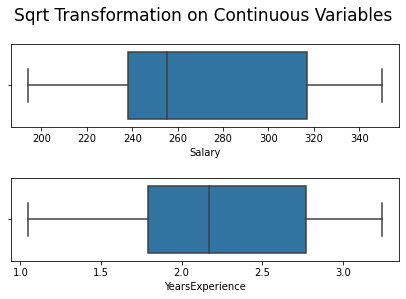

In [25]:
fig, ax=plt.subplots(2, figsize=(6,4), sharex= False, sharey = False)
sns.boxplot(np.sqrt(data_s.Salary), ax=ax[0])
sns.boxplot(np.sqrt(data_s.YearsExperience), ax=ax[1])
plt.suptitle("Sqrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


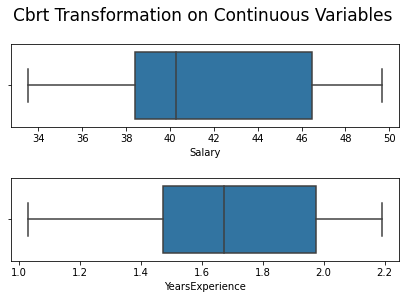

In [26]:
fig, ax=plt.subplots(2, figsize=(6,4), sharex= False, sharey = False)
sns.boxplot(np.cbrt(data_s.Salary), ax=ax[0])
sns.boxplot(np.cbrt(data_s.YearsExperience), ax=ax[1])
plt.suptitle("Cbrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

In [27]:
#Correlation Coefficents
data_s.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


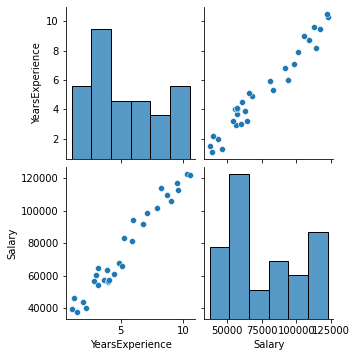

In [28]:
sns.pairplot(data_s)

***Fitting a Regression model***

In [29]:
import statsmodels.formula.api as smf

In [30]:
model = smf.ols('Salary~YearsExperience', data = data_s).fit()

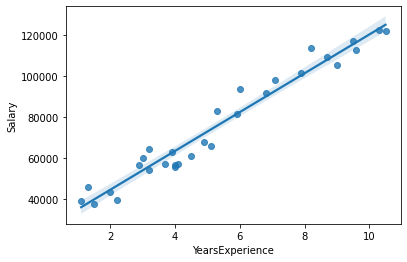

In [31]:
sns.regplot(x = 'YearsExperience', y = 'Salary', data = data_s)

In [32]:
#Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [33]:
#get t-values & p-values
print(model.tvalues, '\n' ,model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [34]:
#get rsquared value
(model.rsquared, model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 09 Sep 2022   Prob (F-statistic):           1.14e-20
Time:                        14:27:16   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Residual Analysis***

***Test normality of residual through QQ Plot ***

In [37]:
import statsmodels.api as sm

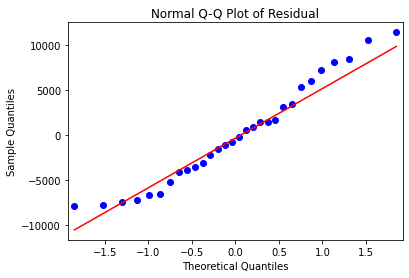

In [38]:
#q line is the 45 degrees line
qqplot = sm.qqplot(model.resid, line= 'q')
plt.title('Normal Q-Q Plot of Residual')
plt.show()


In [39]:
import numpy as np
list(np.where(model.resid>10000))

[array([19, 23])]

Residual Plot for Homoscedasticity

In [40]:
def get_standardize_values( vals): 
  return (vals - vals.mean())/vals.std() # get standardized values of fitted values and residual

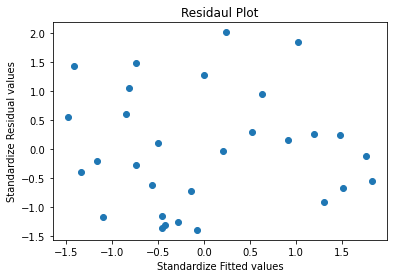

In [41]:
plt.scatter(get_standardize_values(model.fittedvalues), get_standardize_values(model.resid))
plt.ylabel('Standardize Residual values')
plt.xlabel('Standardize Fitted values')
plt.title('Residaul Plot')
plt.show()

Residual vs Regressors

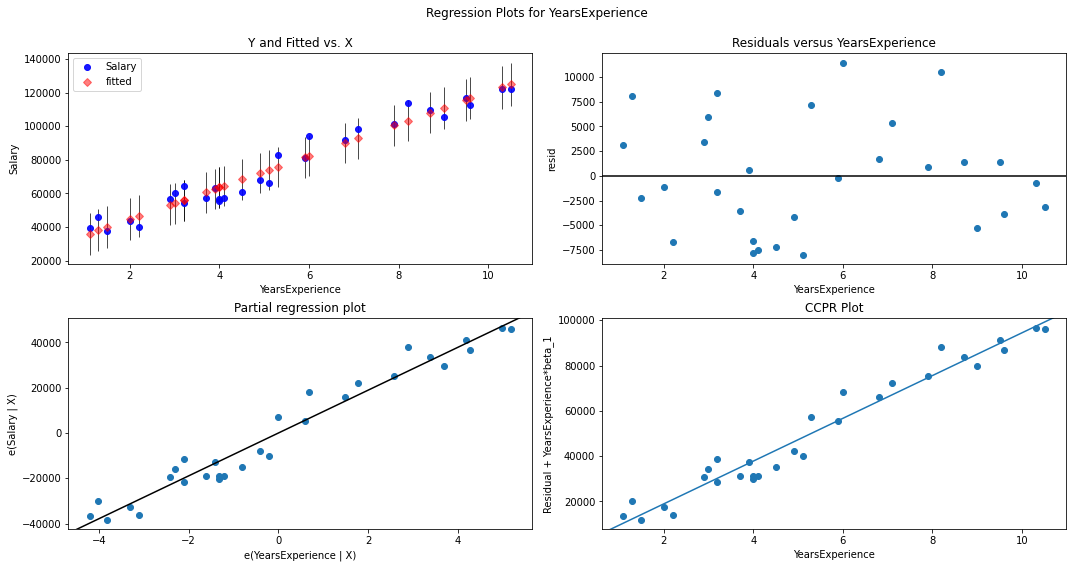

In [42]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'YearsExperience', fig=fig)
plt.show()

***Model Deletion using Cooks Distance and Leverage value***

In [43]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


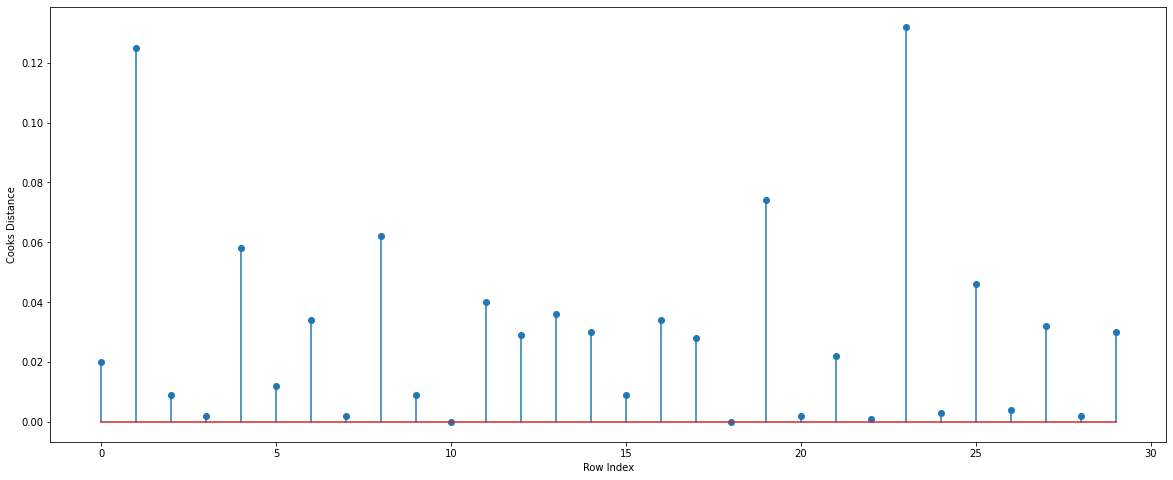

In [44]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(data_s)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [45]:
#index and values of influencers where c is more than .5
(np.argmax(c), np.max(c))

(23, 0.13175452313135258)

High Influence Points

In [46]:
from statsmodels.graphics.regressionplots import influence_plot

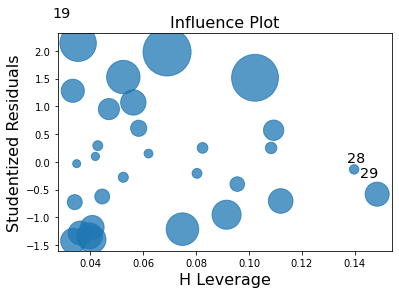

In [47]:
influence_plot(model)
plt.show()

In [48]:
k = data_s.shape[1]
n = data_s.shape[0]
leverage_cutoff = 3*(k+1)/n

In [49]:
leverage_cutoff

0.3

From the above plots, we can conclude that there are no influencers or outliers in dataset. No deletion required

***Prediction***

In [50]:
#Get predicted value for YearsExperience = 5,10
newdata = pd.Series([5,10])

In [51]:
data_pred = pd.DataFrame(newdata, columns = ['YearsExperience'])

In [52]:
data_pred

,YearsExperience
0,5
1,10


In [53]:
model.predict(data_pred)

0     73042.011806
1    120291.823413
dtype: float64